<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline

In [2]:
import networkx as nx

/Users/deepak/miniconda3/envs/python3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


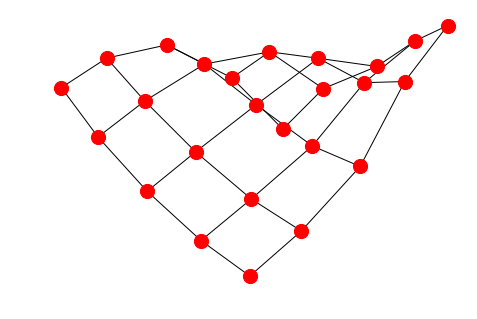

In [3]:
L = 5
G = nx.grid_2d_graph(L,L)
nx.draw(G,node_size=200)

In [4]:
import network2tikz as nxtikz

ModuleNotFoundError: No module named 'network2tikz'

In [7]:
nxtikz.plot?

In [9]:
nxtikz.plot(G,"squarelattice.tex")

No layout was assigned! Hence a random layout was chosen!


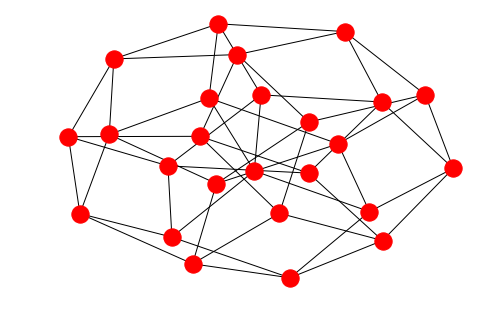

In [5]:
G = nx.grid_2d_graph(L,L,periodic=True)
nx.draw(G)

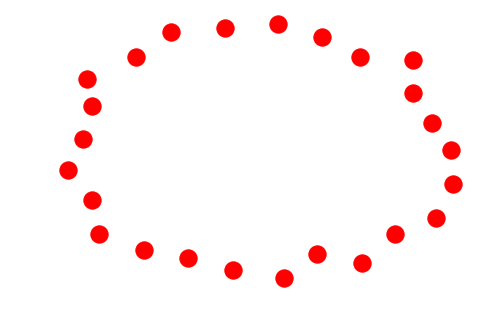

In [6]:
g1 = nx.Graph()

for x in range(L):
    for y in range(L):
        g1.add_node((x,y))

nx.draw(g1)

In [7]:
for x in range(L):
    for y in range(L):
        if x<(L-1) and y<(L-1):
            g1.add_edge((x,y),(x,y+1))
            g1.add_edge((x,y),(x+1,y))
        if x==(L-1) and y<(L-1):
            g1.add_edge((x,y),(x,y+1))
        if y==(L-1) and x<(L-1):
            g1.add_edge((x,y),(x+1,y))

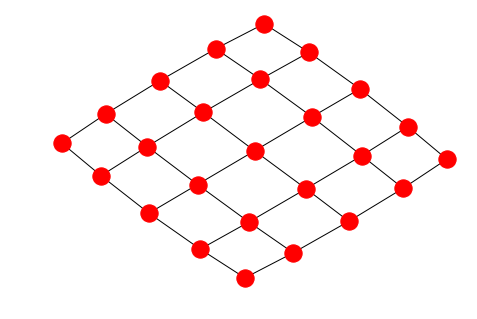

In [8]:
nx.draw(g1)

In [9]:
import numpy as np

In [10]:
np.random.random_sample?

In [11]:
class SquareLattice():
    
    graph = nx.empty_graph(0)
    size = 0
    state = np.empty([]) # create empty array
    color_map = {1:'r',-1:'b'}
    node_color_dict = {} # dictionary whose keys are nodes and values are colors for each node
    node_colors = []
    pos_dict = {}
    
    scale_mult = 0
    
    def __init__(self,size=10,periodic=False):
        self.size = size
        self.graph = nx.grid_2d_graph(size,size,periodic)
        self.state = np.zeros([size,size])
        self.setRandomState()
        
        self.scale_mult = 10.0/self.size
        
        for node in self.graph:
            self.pos_dict[node] = [self.scale_mult*node[0],self.scale_mult*node[1]] # set the node co-ordinates to be same as node indices
    
    def setRandomState(self):
        '''Iterates over all nodes in the graph. For each node, creates an attribute
        labeled 'state', and assigns to it +1 or -1 at random  '''
        values = [-1,1] # Possible states of a given site
        for node in self.graph:
            self.graph.node[node]['state'] = values[np.random.randint(2)]
#             self.node_color.append(self.color_map[self.graph.node[node]['state']])
#             self.node_color_dict[node] = self.color_map[self.graph.node[node]['state']]
            self.graph.node[node]['color'] = self.color_map[self.graph.node[node]['state']]
#         self.node_colors = list(self.node_color_dict.values())
        self.node_colors = list(nx.get_node_attributes(self.graph,'color').values())
    
    def draw(self):
        nx.draw(self.graph,pos=self.pos_dict,node_color=self.node_colors,node_size=50*self.scale_mult)
                

In [12]:
color_map = {1:'r',-1:'b'}

In [324]:
color_map[-1]

'b'

In [13]:
latt = SquareLattice(size=10)

In [14]:
latt.state;

In [15]:
latt.setRandomState()

In [16]:
latt.node_colors

['r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b']

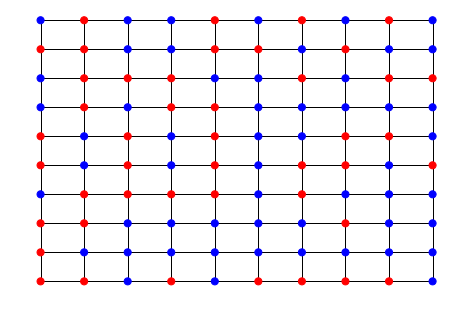

In [17]:
latt.draw()